In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [2]:
(xtrain,_), (xtest,_) = fashion_mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
# normalize the images

x_train = xtrain.astype('float32') / 255.
x_test = xtest.astype('float32') / 255.

In [5]:
# adding new dimension to the images

x_train = xtrain[...,tf.newaxis]

x_test = x_test[...,tf.newaxis]

In [6]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [8]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

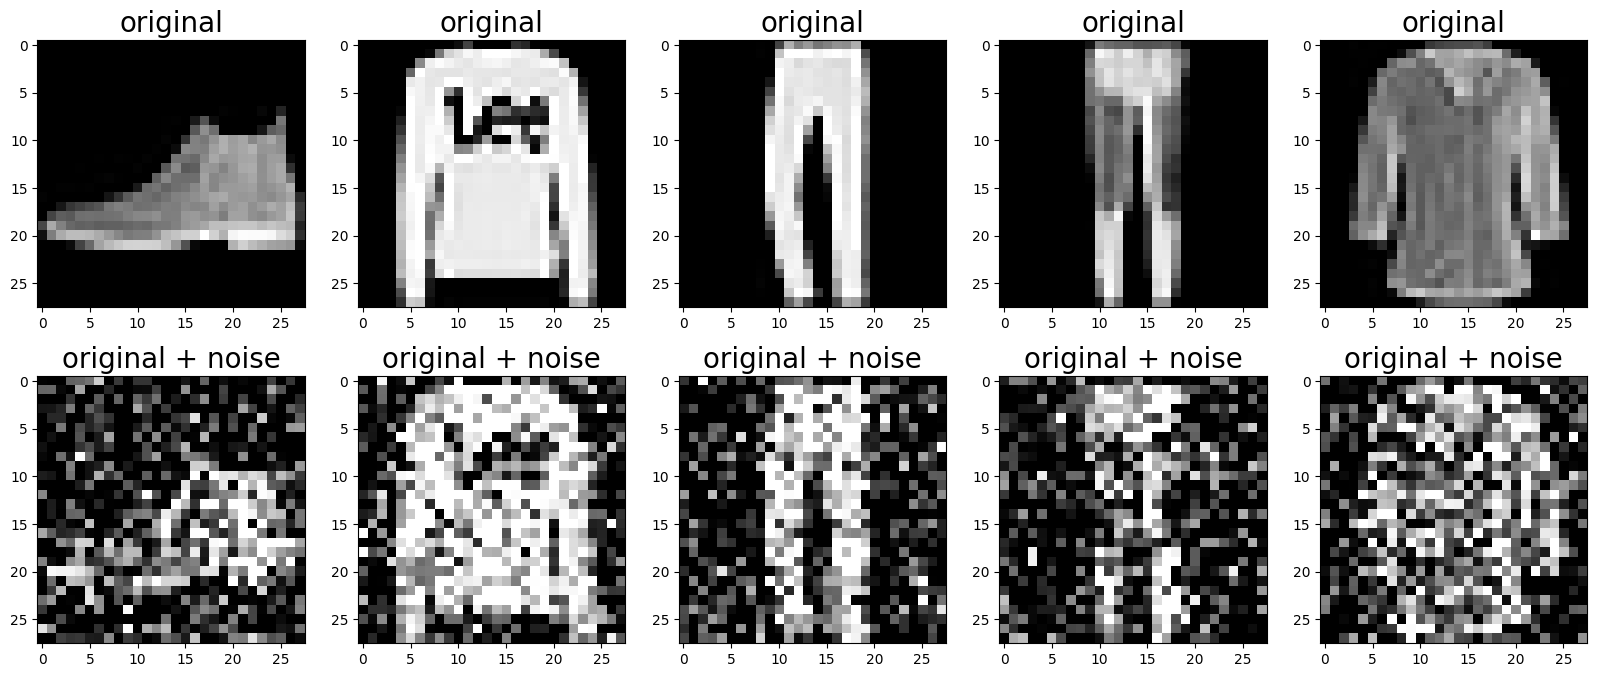

In [9]:
n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

In [10]:
# Build encoder decoder model using keras functional API

from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose

class NoiseRemover(tf.keras.Model):
    def __init__(self):
        
        super(NoiseRemover,self).__init__()
        
        self.encoder = tf.keras.Sequential([
            Input(shape=(28,28,1)),
            Conv2D(16,3,activation='relu',padding='same',strides=2),
            Conv2D(8,3,activation='relu',padding='same',strides=2)
        ])
        
        self.decoder = tf.keras.Sequential([
            Conv2DTranspose(8,3,activation='relu',padding='same',strides=2),
            Conv2DTranspose(16,3,activation='relu',padding='same',strides=2),
            Conv2D(1,3,activation='sigmoid',padding='same')
            
        ])
        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
            
        


In [11]:
auto_encoder = NoiseRemover()

In [12]:
auto_encoder.compile(optimizer='adam', loss='mse')

In [13]:
auto_encoder.fit(x_train_noisy, x_train, epochs=10, validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 13280.0977 - val_loss: 0.1067
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.8545 - val_loss: 0.0910
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.8184 - val_loss: 0.0777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.8066 - val_loss: 0.0716
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.8115 - val_loss: 0.0621
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.8115 - val_loss: 0.0587
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 13278.7998 - val_loss: 0.0590
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.7773 - val_loss: 0.0613
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 13278.7588 - val_loss: 0.0679
Epoch 10/10
1875/1875 [=======================

In [15]:
encoded_imgs=auto_encoder.encoder(x_test_noisy).numpy()
decoded_imgs=auto_encoder.decoder(encoded_imgs)

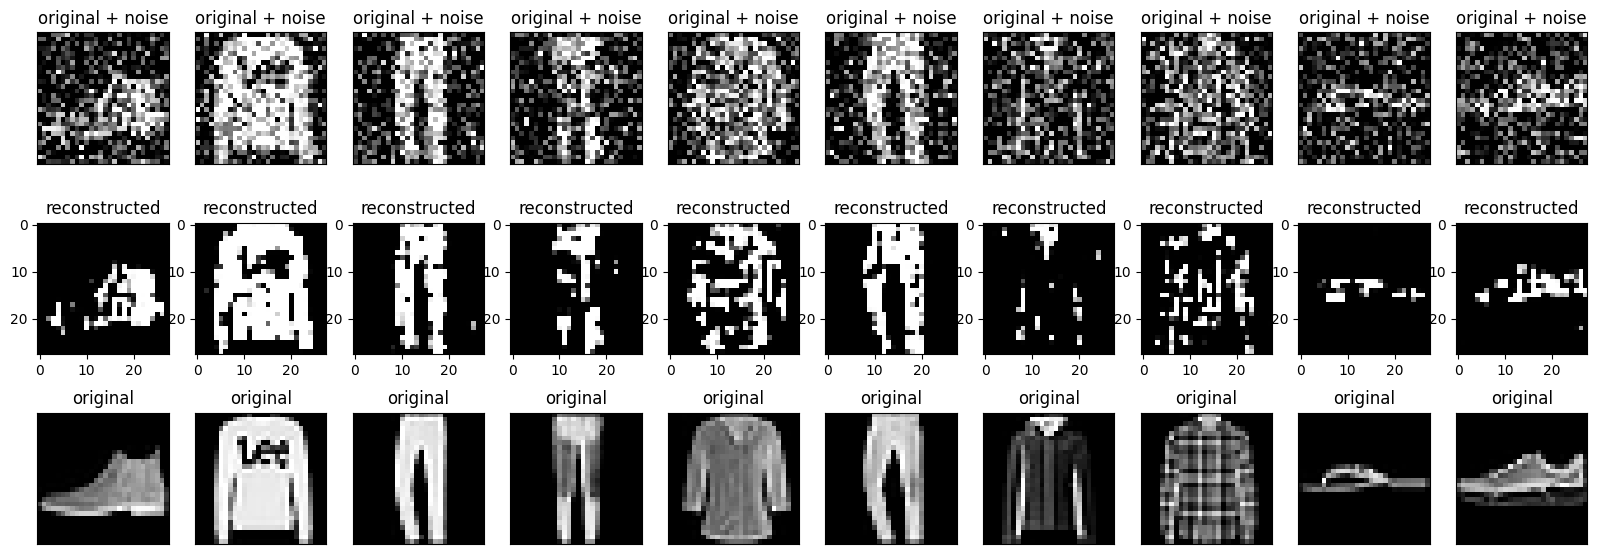

In [16]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()